In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow
#python3 -m pip install tensorflow[and-cuda]
# python -m pip install tensorflow

This WBCD dataset is consisted of (569, 33)
This WBCD dataset is consisted of (569, 32)
Training Data : (398, 32)
Testing Data : (171, 32)
Training Data : (398, 31)
Testing Data : (171, 31)
Training Data : (398, 30)
Testing Data : (171, 30)
Training Data : (398, 1)


Instructions for updating:
non-resource variables are not supported in the long term


Testing Data : (171, 1)
===========Data Summary===========
Training Data : (398, 30)
Testing Data : (171, 30)

============Processing============
Step:     0	Loss: 0.848	Acc: 39.70%
Step:  1000	Loss: 0.238	Acc: 91.21%
Step:  2000	Loss: 0.180	Acc: 94.72%
Step:  3000	Loss: 0.154	Acc: 96.23%
Step:  4000	Loss: 0.138	Acc: 96.98%
Step:  5000	Loss: 0.128	Acc: 97.49%
Step:  6000	Loss: 0.120	Acc: 97.74%
Step:  7000	Loss: 0.114	Acc: 97.99%
Step:  8000	Loss: 0.110	Acc: 98.24%
Step:  9000	Loss: 0.106	Acc: 98.24%
Step: 10000	Loss: 0.102	Acc: 98.24%

============Results============
Model Prediction = 0.98241204
Test Prediction = 0.94736844


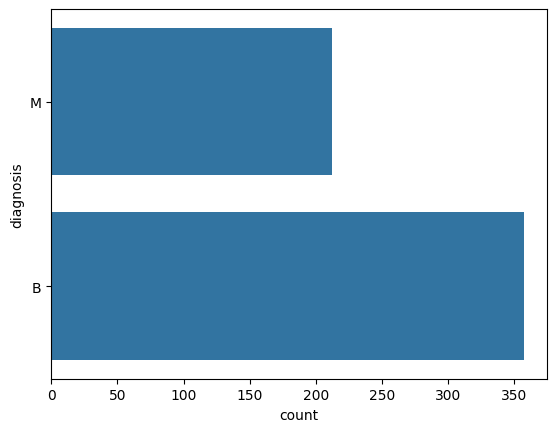

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[24]:


#import libraries



import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")


# In[25]:


#import the dataset
wbcd = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MLNN/Week-8/breast cancer_week 8 and 9.csv")
wbcd.head()


# In[26]:


#shape of the dataset
print("This WBCD dataset is consisted of",wbcd.shape)


# In[27]:


#remove nan values
wbcd = wbcd.iloc[:,:-1]
print("This WBCD dataset is consisted of",wbcd.shape)


# In[28]:


sns.countplot(wbcd['diagnosis'],label="Count")


# In[29]:


#train test split

train,test = train_test_split(wbcd, test_size=0.3, random_state=42)
print("Training Data :",train.shape)
print("Testing Data :",test.shape)


# In[30]:


#drop id column
train_id = train['id']
test_id = test['id']

train_data = train.iloc[:,1:]
test_data = test.iloc[:,1:]

print("Training Data :",train_data.shape)
print("Testing Data :",test_data.shape)


# In[31]:



#normlise the data
# Training Data
train_x = train_data.iloc[:,1:]
train_x = MinMaxScaler().fit_transform(train_x)
print("Training Data :", train_x.shape)

# Testing Data
test_x = test_data.iloc[:,1:]
test_x = MinMaxScaler().fit_transform(test_x)
print("Testing Data :", test_x.shape)


# In[32]:


# Change Results(diagnosis) format : String -> Numeric¶
 #Training Data
train_y = train_data.iloc[:,:1]
train_y[train_y=='M'] = 0
train_y[train_y=='B'] = 1
print("Training Data :", train_y.shape)

# Testing Data
test_y = test_data.iloc[:,:1]
test_y[test_y=='M'] = 0
test_y[test_y=='B'] = 1
print("Testing Data :", test_y.shape)


# In[33]:


'''Make ANN-SLP Model
Make "Placeholder" for dynamic variable allocation
Placeholder is one of the function in tensorflow. It is a space to put and change values while the program is running.

for X, a place must have 30 columns, since wbcd data has 30 features.
for Y, a place must have 1 columns, since the results has 1 outcome.
If you see the row "None", it means it has no size limits. (You can write -1 instead of "None")'''


import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder(tf.float32, [None,30])
Y = tf.placeholder(tf.float32, [None, 1])



# In[34]:


'''Make Weight, Bias value with randomly¶
W(weight) : why [30,1]? 16 for 16 features, 1 for 1 Outcome(results).
P(weight): why [10,1]? 10 for 10 PCA features, 1 for 1 Outcome(results).
b(bias) : why [1]? outcome has 1 layers.'''

# weight
W = tf.Variable(tf.random_normal([30,1], seed=0), name='weight')

# bias
b = tf.Variable(tf.random_normal([1], seed=0), name='bias')


# In[35]:


#Make Output Results
#Output = Weight * Input + Bias
#tf.matmul() : for array multiply


logits = tf.matmul(X,W) + b


# In[36]:


hypothesis = tf.nn.sigmoid(logits)

cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
cost = tf.reduce_mean(cost_i)
# cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))


# In[38]:


#compare  origina vs prediction

prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
correct_prediction = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))


# In[39]:


def ann_slp():
    print("===========Data Summary===========")
    print("Training Data :", train_x.shape)
    print("Testing Data :", test_x.shape)

    X = tf.placeholder(tf.float32, [None,30])
    Y = tf.placeholder(tf.float32, [None, 1])

    W = tf.Variable(tf.random_normal([30,1], seed=0), name='weight')
    b = tf.Variable(tf.random_normal([1], seed=0), name='bias')

    logits = tf.matmul(X,W) + b
    hypothesis = tf.nn.sigmoid(logits)
    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})

        print("\n============Results============")
        print("Model Prediction =", train_acc)
        print("Test Prediction =", test_acc)

        return train_acc,test_acc

ann_slp_train_acc, ann_slp_test_acc = ann_slp()



In [1]:
import numpy as np

class SingleLayerFeedForwardNetwork:
    def __init__(self, input_size):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def train(self, X, y, learning_rate=0.01, epochs=1000):
        for _ in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Compute gradients
            error = y_pred - y
            d_weights = np.dot(X.T, error) / len(y)
            d_bias = np.sum(error) / len(y)

            # Update parameters
            self.weights -= learning_rate * d_weights
            self.bias -= learning_rate * d_bias

    def predict(self, X, threshold=0.5):
        return (self.forward(X) >= threshold).astype(int)

# Example usage
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

model = SingleLayerFeedForwardNetwork(input_size=2)
model.train(X, y)

# Make predictions
print(model.predict(X))

[1 1 1 1]
